<a href="https://colab.research.google.com/github/Krylze/Data-Science/blob/main/Resolver_problema_Social_Ads_(Clasificaci%C3%B3n)_usando_Vecinos_mas_Cercanos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/Data/Social_Network_Ads.csv')
print(data.sample(6))

     Age  EstimatedSalary  Purchased
120   36            75000          0
34    27            90000          0
220   41            80000          0
104   19            21000          0
308   36           125000          1
293   37            77000          0


## Analisis Descriptivo

In [ ]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


Purchased
0    257
1    143
Name: count, dtype: int64


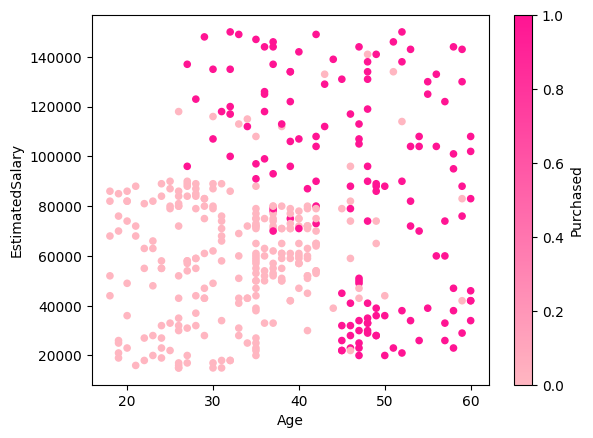

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
from matplotlib import pyplot as plt
print(data.Purchased.value_counts())
pink_cmap = mcolors.LinearSegmentedColormap.from_list("pink_cmap", ["lightpink", "deeppink"])
data.plot(kind='scatter', x='Age', y='EstimatedSalary', c="Purchased", colormap=pink_cmap)
plt.show()
plt.show

## Segmentacion de datos

In [ ]:
x = data.drop(['Purchased'], axis=1)
y = data['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred[0:10])
print(y_test[0:10])

[1 1 0 1 0 0 1 0 0 0]
209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


## Ealuar el modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print("Precisión del modelo:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6428571428571429
0.75
0.6923076923076923
Precisión del modelo: 0.8
[[46  6]
 [10 18]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        52
           1       0.75      0.64      0.69        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.80        80



## Evaluar modelo de K

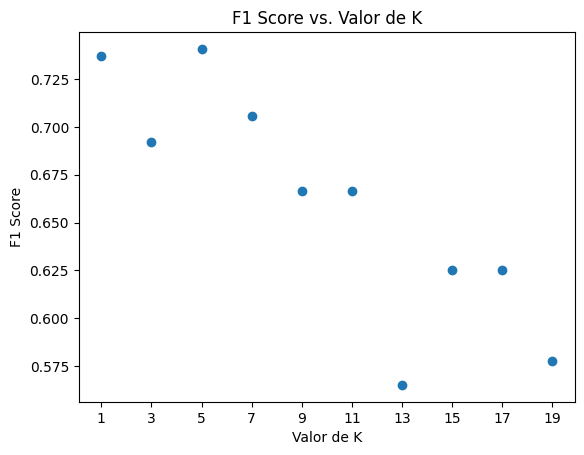

In [ ]:
k_range = range(1, 21, 2)
f1_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    f1_list.append(f1)

plt.scatter(k_range, f1_list)
plt.xlabel('Valor de K')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Valor de K')
plt.xticks(k_range)
plt.show()

## Conlusion
En conclusion el K vale 5 por su alta precision al modelo y que represente un equilibrio entre la identificación precisa de instancias positivas y la evitación de falsos positivos excesivos.